In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
path_file = '../data/parsed/'

df = pd.DataFrame([])

for file in os.listdir(path_file):
    df_temp = pd.read_parquet(os.path.join(path_file,file))
    df_temp['Year'] = file.split('.')[0]
    df = pd.concat([df,df_temp],axis=0)

In [3]:
df

,Número d'expedient,Descripció causa conductor,Descripció causa vianant,FLAG - Probable responsable,Desc. Tipus vehicle implicat,Descripció tipus persona,Year
0,2019S000001,Desobeir semàfor,Desconegut,0.0,Turisme,Vianant,2019
1,2019S000001,Desobeir semàfor,Desconegut,1.0,Turisme,Conductor,2019
2,2019S000001,No determinada,Desconegut,0.0,Turisme,Vianant,2019
3,2019S000001,No determinada,Desconegut,1.0,Turisme,Conductor,2019
4,2019S000001,No determinada,Desconegut,0.0,Turisme,Passatger,2019
...,...,...,...,...,...,...,...
15943,2020S006277,Altres,Desconegut,0.0,Motocicleta,Passatger,2020
15944,2020S006277,Manca d'atenció a la conducció,Desconegut,1.0,Motocicleta,Conductor,2020
15945,2020S006278,No determinada,Desconegut,1.0,Turisme,Conductor,2020
15946,2020S006279,Manca d'atenció a la conducció,Desconegut,1.0,Motocicleta,Conductor,2020


In [4]:
df.Year.value_counts()

2019    23669
2018    23358
2022    19724
2021    19063
2020    15948
Name: Year, dtype: int64

In [5]:
df['FLAG - Probable responsable'].value_counts()

 1.0    51085
 0.0    50644
-1.0       20
Name: FLAG - Probable responsable, dtype: int64

In [6]:
df.columns

Index(['Número d'expedient', 'Descripció causa conductor',
       'Descripció causa vianant', 'FLAG - Probable responsable',
       'Desc. Tipus vehicle implicat', 'Descripció tipus persona', 'Year'],
      dtype='object')

In [7]:
import seaborn as sns

In [8]:
df_g = df.groupby(['Year','Descripció causa conductor'],as_index=False)[["Número d'expedient"]].nunique()

In [9]:
df_p = df_g.pivot_table(index='Year',columns='Descripció causa conductor',values="Número d'expedient").fillna(0)

<Axes: xlabel='Year'>

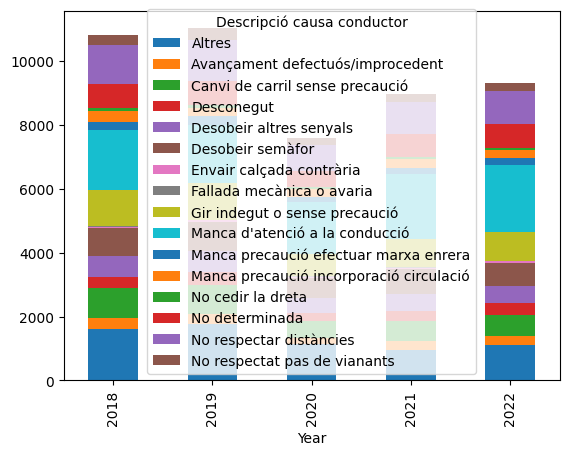

In [10]:
df_p.plot(kind='bar', stacked=True)

In [27]:
# I need to correct the 2022 values!

<Axes: xlabel='Year', ylabel="Número d'expedient">

/home/vboxuser/.local/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 135 (\x87) missing from current font.
  func(*args, **kwargs)
/home/vboxuser/.local/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 133 (\x85) missing from current font.
  func(*args, **kwargs)
/home/vboxuser/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 135 (\x87) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/vboxuser/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 133 (\x85) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


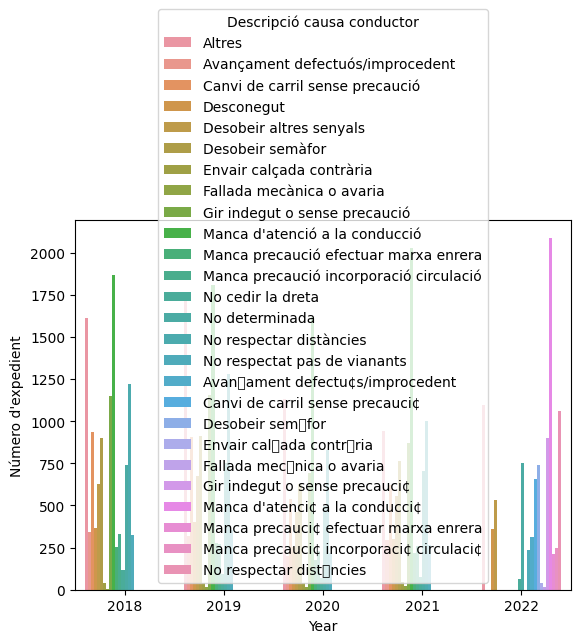

In [19]:
sns.barplot(data=df_g,x='Year',y="Número d'expedient",hue='Descripció causa conductor',)